<a href="https://colab.research.google.com/github/ssroka/ML_with_IBM_GeoDN/blob/main/MPI_detect_RI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Packages

In [ ]:
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# sklearn
from sklearn.preprocessing import StandardScaler

# The usual suspects
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle



In [ ]:
HURDAT2_Atlantic_2010_plus = "/content/drive/MyDrive/Colab Notebooks/IBM_Climate_Conference/AT_allTsteps_2010_plus_result.pkl"

with open(HURDAT2_Atlantic_2010_plus, 'rb') as f:
    data = pickle.load(f)


In [ ]:
X = []
y = []
N_data = len(data)
for j in range(N_data): # 
  n = len(data[j])
  for i in range(n-13):
    if not(any(data[j].Ta[i:i+13].values == None)) and not(any(pd.isnull(data[j].MPI[i:i+13].values))): # see if any data in this range could not be found 
      X.append(data[j][i:8+i].reset_index(drop=True))
      y.append(data[j].vmax[i+13]-data[j].vmax[i+8])

## select the test and training data

In [ ]:
N_X = len(X)
PI_min_vmax = []
for i in range(N_X):
  PI_min_vmax.append(X[i]['MPI'].values-X[i]['vmax'].values)

In [ ]:
len(y)
i = 1
print(y[i]*np.ones(len(PI_min_vmax[i]),))
print(PI_min_vmax[i])

[-7.716 -7.716 -7.716 -7.716 -7.716 -7.716 -7.716 -7.716]
[68.51375950472121 64.58066324342224 54.081743566527166 50.77296861114142
 55.48567072277939 50.760911691232 42.48868045590136 36.642403780402006]


In [ ]:
no_of_colors=len(PI_min_vmax)
r = np.linspace(0,1,no_of_colors)
b = np.ones(no_of_colors,)*0.5
g = np.ones(no_of_colors,)*0.5
color=np.concatenate((r[:,None],b[:,None],g[:,None]),axis=1)
print(color[1,:])

[0.00289017 0.5        0.5       ]


<ipython-input-9-fadd802a9087>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(PI_min_vmax[i],y[i]*np.ones(len(PI_min_vmax[i]),),c=color[count,:])


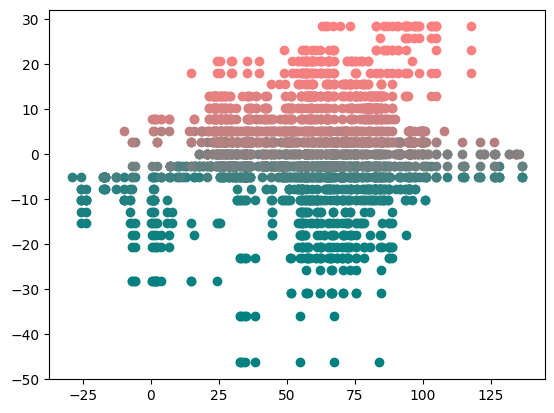

<ipython-input-9-fadd802a9087>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(PI_min_vmax[i][-1],y[i],c=color[count,:])


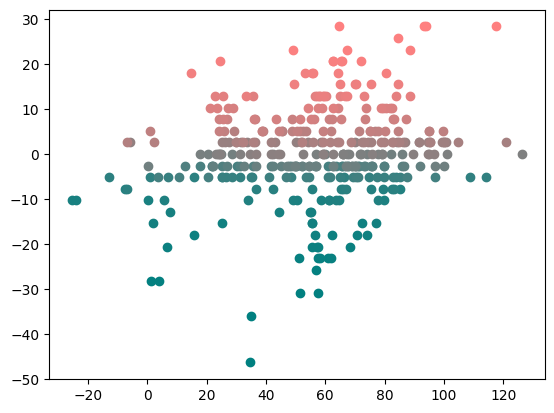

In [ ]:
ind = np.argsort(y)

count = 0
for i in ind:
  plt.scatter(PI_min_vmax[i],y[i]*np.ones(len(PI_min_vmax[i]),),c=color[count,:])
  count += 1
plt.show()

count = 0
x_reg = []
y_reg = []
for i in ind:
  plt.scatter(PI_min_vmax[i][-1],y[i],c=color[count,:])
  if PI_min_vmax[i][-1]>0.0 and any(X[i]['vmax'].values>30):
    x_reg.append(np.max(PI_min_vmax[i][-1]))
    y_reg.append(y[i])
  count += 1

(array([[  4.,   9.,   7.,  59.,  38.,  78.,  87.,  51.,   6.,   8.],
        [  5.,  10.,   8.,  61.,  39.,  87.,  84.,  43.,   4.,   6.],
        [  6.,  10.,   6.,  67.,  40.,  91.,  82.,  36.,   3.,   6.],
        [  6.,  11.,   7.,  68.,  43.,  95.,  76.,  31.,   4.,   6.],
        [  6.,  12.,   8.,  70.,  41.,  97.,  75.,  29.,   5.,   4.],
        [  5.,  13.,  11.,  67.,  42.,  98.,  75.,  28.,   5.,   3.],
        [  4.,  14.,  13.,  58.,  48., 102.,  75.,  26.,   4.,   3.],
        [  3.,  13.,  12.,  59.,  49., 103.,  74.,  28.,   4.,   2.]]),
 array([-29.10742255, -12.54510426,   4.01721404,  20.57953233,
         37.14185063,  53.70416893,  70.26648722,  86.82880552,
        103.39112382, 119.95344211, 136.51576041]),
 <a list of 8 BarContainer objects>)

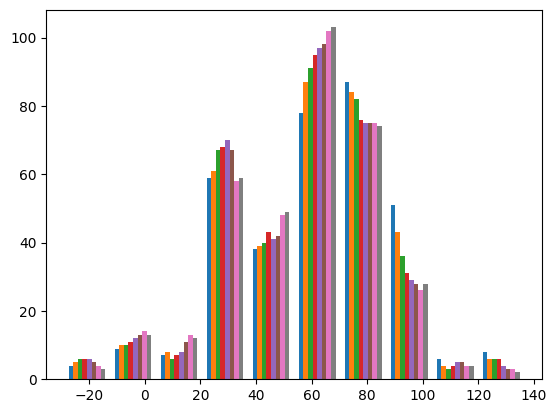

In [ ]:
plt.hist(np.squeeze(PI_min_vmax))

In [ ]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_reg, y_reg)
print(r_value)

0.12309854016916331


In [ ]:
X[i]['MPI'].values

array([116.65522297291356, 110.42538943654212, 109.62526285612479,
       111.50171818637247, 117.69664274696957, 115.83483188457598,
       107.47504740762602, 108.8448009597418], dtype=object)

In [ ]:
X

[   Name  Year Month Day   Time    Lat     Lon    vmax    pmin          Ta  \
 0  ALEX  2010    06  24   1800   15.9    82.0  12.860  1007.0  301.755891   
 1  ALEX  2010    06  25   0000   16.0    82.1  12.860  1006.0  301.605449   
 2  ALEX  2010    06  25   0600   16.1    82.3  12.860  1006.0  302.371035   
 3  ALEX  2010    06  25   1200   16.2    82.5  15.432  1005.0  302.289293   
 4  ALEX  2010    06  25   1800   16.4    83.1  15.432  1005.0  302.368448   
 5  ALEX  2010    06  26   0000   16.6    83.9  15.432  1004.0  302.231075   
 6  ALEX  2010    06  26   0600   16.7    84.9  20.576  1004.0  302.412402   
 7  ALEX  2010    06  26   1200   16.9    86.1  20.576  1004.0  302.271879   
 
            Ts          Td          To            Dk       eps              p  \
 0  301.615483  299.169858  189.877006   7333.930646   0.58848  100112.650625   
 1  302.022064  298.433645  190.341299  11309.392649  0.586743    99995.19375   
 2  301.996926  298.474396  190.380643  10311.832528 

## extract test and training data

In [ ]:
PI_min_vmax[0]

array([52.753209185591274, 68.51375950472121, 64.58066324342224,
       54.081743566527166, 50.77296861114142, 55.48567072277939,
       50.760911691232, 42.48868045590136], dtype=object)

In [ ]:
for i in range(len(X)):
  next_x = np.concatenate((X[i][['Ta','To','Ts','Td','vmax','pmin','MPI','Dk']].to_numpy(),PI_min_vmax[i][:,None]),axis=1)
  next_y = X[i]['vmax']
  if i>0:
    x = np.concatenate((x,next_x),axis=0)
    y = np.concatenate((y,next_y),axis=0)
  else:
    x = next_x
    y = next_y

print(x)

[[301.7558911132812 189.87700561523437 301.6154833984375 ... 1007.0
  65.61320918559127 7333.930645700656]
 [301.60544921875 190.341298828125 302.0220642089844 ... 1006.0
  81.3737595047212 11309.392648617213]
 [302.37103515625 190.38064270019532 301.99692626953123 ... 1006.0
  77.44066324342224 10311.832527993494]
 ...
 [302.23107543945315 190.32436889648437 302.2973352050781 ... 1004.0
  70.91767072277939 8573.787359413616]
 [302.41240234375 190.74521606445313 302.2396545410156 ... 1004.0
  71.336911691232 8735.87180952119]
 [302.2718786621094 192.71500732421876 301.9680187988281 ... 1004.0
  63.06468045590136 7050.132540636632]]


In [ ]:
len(X)*8 == len(x)

True

## normalize the data

In [ ]:
# standardize data (set all features to mean = 0 and standard deviation = 1)
scaler = StandardScaler()
scaler.fit(x)
X_standard = scaler.transform(x)

In [ ]:
features = X_standard
targets = y>

(2776, 9)

### Create data set

In [ ]:
# create a class Data that Dataloader can use

class Data(Dataset):
  # input:
  # x = Nxm numpy array were N is samples and m is features
  # y = Nx1 numpy array
    def __init__(self,x,y):
        self.x=torch.from_numpy(x).to(torch.float32) # convert numpy array to tensor
        self.y=torch.from_numpy(y).to(torch.float32) # convert numpy array to tensor
        self.len=self.x.shape[0]
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [ ]:
data_set = Data(x_standard,y)
batch_size = 100
train_loader = DataLoader(dataset=data_set, batch_size=batch_size)

In [ ]:
D_in = np.size(x,axis=1) # number of features
H = 2                    # 2 neurons in the hidden layer
D_out = 1                # T/F

In [ ]:
class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [ ]:
train_loader = DataLoader(dataset=data_set, batch_size=200)
model = NetRelu(2,2,1)
learning_rate=0.1
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

def accuracy(y,yhat):
  acc = np.mean(y.detach().numpy().astype(int)==yhat.detach().numpy().astype(int))
  return acc

In [ ]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    ACC = []
    COST = []
    for epoch in range(epochs):
        total_loss=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x.view(-1,2))
            loss = criterion(yhat, y.unsqueeze(1))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total_loss+=loss.item()
        ACC.append(accuracy(data_set.y,model(data_set.x).view(-1)))
        COST.append(total_loss)
    return [ACC,COST]